In [1]:
import pandas as pd
import datetime as dt
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('./data/spyvooSpreadTSDailyHedgeRatio.csv')

In [3]:
data = data[['datetime', 'spread', 'spyprice', 'vooprice']]
data['datetime'] = pd.to_datetime(data["datetime"])
data.tail()

,datetime,spread,spyprice,vooprice
135486249,2020-10-30 15:49:59.987597,0.000766,324.12,297.77
135486250,2020-10-30 15:49:59.987600,0.000766,324.12,297.77
135486251,2020-10-30 15:49:59.989840,0.000797,324.13,297.77
135486252,2020-10-30 15:49:59.992486,0.000766,324.12,297.77
135486253,2020-10-30 15:49:59.998130,0.000828,324.14,297.77


In [4]:
data['monthperiod'] = data['datetime'].dt.to_period('M')
data.tail()

,datetime,spread,spyprice,vooprice,monthperiod
135486249,2020-10-30 15:49:59.987597,0.000766,324.12,297.77,2020-10
135486250,2020-10-30 15:49:59.987600,0.000766,324.12,297.77,2020-10
135486251,2020-10-30 15:49:59.989840,0.000797,324.13,297.77,2020-10
135486252,2020-10-30 15:49:59.992486,0.000766,324.12,297.77,2020-10
135486253,2020-10-30 15:49:59.998130,0.000828,324.14,297.77,2020-10


In [5]:
oct2020 = data.loc[data['monthperiod'] == '2020-10']

In [6]:
oct2020

,datetime,spread,spyprice,vooprice,monthperiod
126790787,2020-10-01 09:40:00.008103,0.007942,338.110,308.28,2020-10
126790788,2020-10-01 09:40:00.008108,0.007942,338.110,308.28,2020-10
126790789,2020-10-01 09:40:00.022638,0.007898,338.095,308.28,2020-10
126790790,2020-10-01 09:40:00.028442,0.007913,338.100,308.28,2020-10
126790791,2020-10-01 09:40:00.061936,0.007942,338.110,308.28,2020-10
...,...,...,...,...,...
135486249,2020-10-30 15:49:59.987597,0.000766,324.120,297.77,2020-10
135486250,2020-10-30 15:49:59.987600,0.000766,324.120,297.77,2020-10
135486251,2020-10-30 15:49:59.989840,0.000797,324.130,297.77,2020-10
135486252,2020-10-30 15:49:59.992486,0.000766,324.120,297.77,2020-10


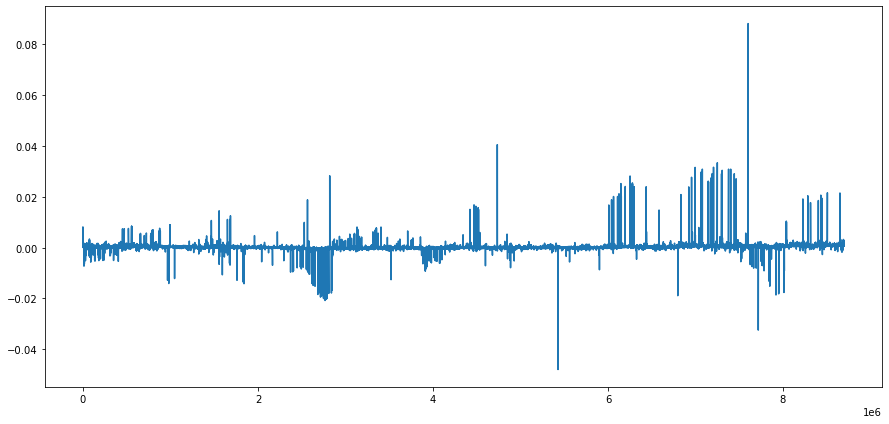

In [7]:
oct2020 = oct2020.reset_index()
plt.figure(figsize = (15,7))
plt.plot(oct2020['spread'])

In [8]:
oct2020.tail()

,index,datetime,spread,spyprice,vooprice,monthperiod
8695462,135486249,2020-10-30 15:49:59.987597,0.000766,324.12,297.77,2020-10
8695463,135486250,2020-10-30 15:49:59.987600,0.000766,324.12,297.77,2020-10
8695464,135486251,2020-10-30 15:49:59.989840,0.000797,324.13,297.77,2020-10
8695465,135486252,2020-10-30 15:49:59.992486,0.000766,324.12,297.77,2020-10
8695466,135486253,2020-10-30 15:49:59.998130,0.000828,324.14,297.77,2020-10


In [19]:
oct2020['dayperiod'] = oct2020['datetime'].dt.to_period("D")
singleDay = oct2020.loc[oct2020['dayperiod'] == '2020-10-28']

In [20]:
singleDay.tail()

,index,datetime,spread,spyprice,vooprice,monthperiod,dayperiod
7517460,134308247,2020-10-28 15:49:59.932938,0.000606,327.86,301.215,2020-10,2020-10-28
7517461,134308248,2020-10-28 15:49:59.933737,0.000637,327.87,301.215,2020-10,2020-10-28
7517462,134308249,2020-10-28 15:49:59.934859,0.000637,327.87,301.215,2020-10,2020-10-28
7517463,134308250,2020-10-28 15:49:59.986308,0.000606,327.86,301.215,2020-10,2020-10-28
7517464,134308251,2020-10-28 15:49:59.990636,0.000637,327.87,301.215,2020-10,2020-10-28


In [21]:
len(singleDay)

720254

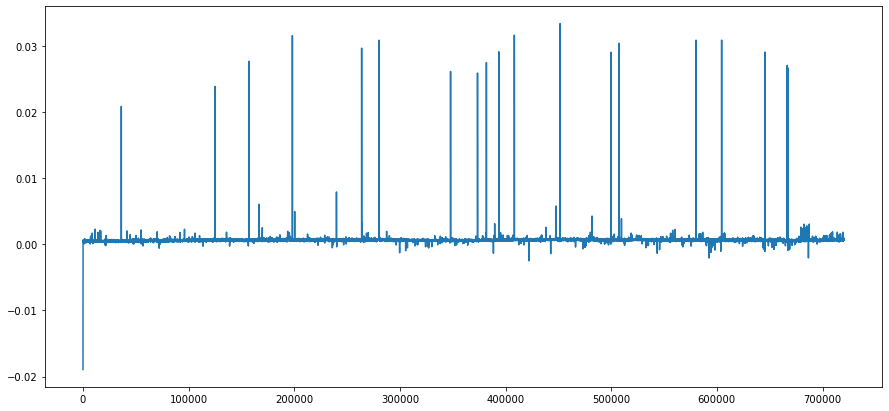

In [22]:
singleDay = singleDay.reset_index()
plt.figure(figsize = (15,7))
plt.plot(singleDay['spread'])

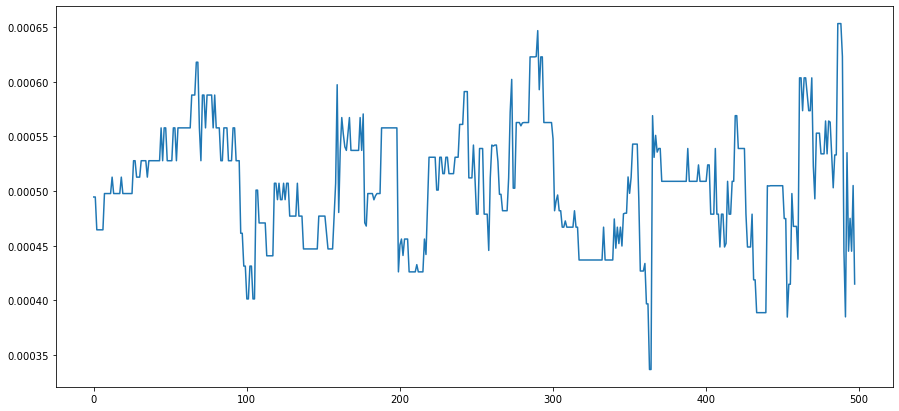

In [29]:
plt.figure(figsize = (15, 7))
plt.plot(singleDay['spread'].values[2:500])

In [24]:
singleDay.loc[singleDay['spread'] > 0.015]

,level_0,index,datetime,spread,spyprice,vooprice,monthperiod,dayperiod
36261,6833472,133624259,2020-10-28 09:53:08.623182,0.020860,338.2483,304.4800,2020-10,2020-10-28
125102,6922313,133713100,2020-10-28 10:26:49.755284,0.023885,336.6500,302.1600,2020-10,2020-10-28
157289,6954500,133745287,2020-10-28 10:35:18.910070,0.027681,338.2483,302.4400,2020-10,2020-10-28
198200,6995411,133786198,2020-10-28 10:52:22.558544,0.031480,338.2483,301.3100,2020-10,2020-10-28
198201,6995412,133786199,2020-10-28 10:52:22.565355,0.031564,338.2483,301.2850,2020-10,2020-10-28
263750,7060961,133851748,2020-10-28 11:19:51.529304,0.029663,338.2483,301.8500,2020-10,2020-10-28
280382,7077593,133868380,2020-10-28 11:29:05.996842,0.030874,338.2483,301.4900,2020-10,2020-10-28
347912,7145123,133935910,2020-10-28 12:04:47.480083,0.026139,338.2483,302.9000,2020-10,2020-10-28
347913,7145124,133935911,2020-10-28 12:04:47.528438,0.026156,338.2483,302.8950,2020-10,2020-10-28
347914,7145125,133935912,2020-10-28 12:04:47.529376,0.026106,338.2483,302.9100,2020-10,2020-10-28
